<a href="https://colab.research.google.com/github/Azhar-ali7/Classification-Project-Coronavirus-Tweet-Sentiment/blob/main/Classification_project_Covid_19_Tweets_Sentiments_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis : Predicting sentiment of COVID-19 tweets

## Problem Description

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

The names and usernames have been given codes to avoid any privacy concerns.

You are given the following information:



1.   Location
2.   Tweet At
3.   Original Tweet
4.   Label

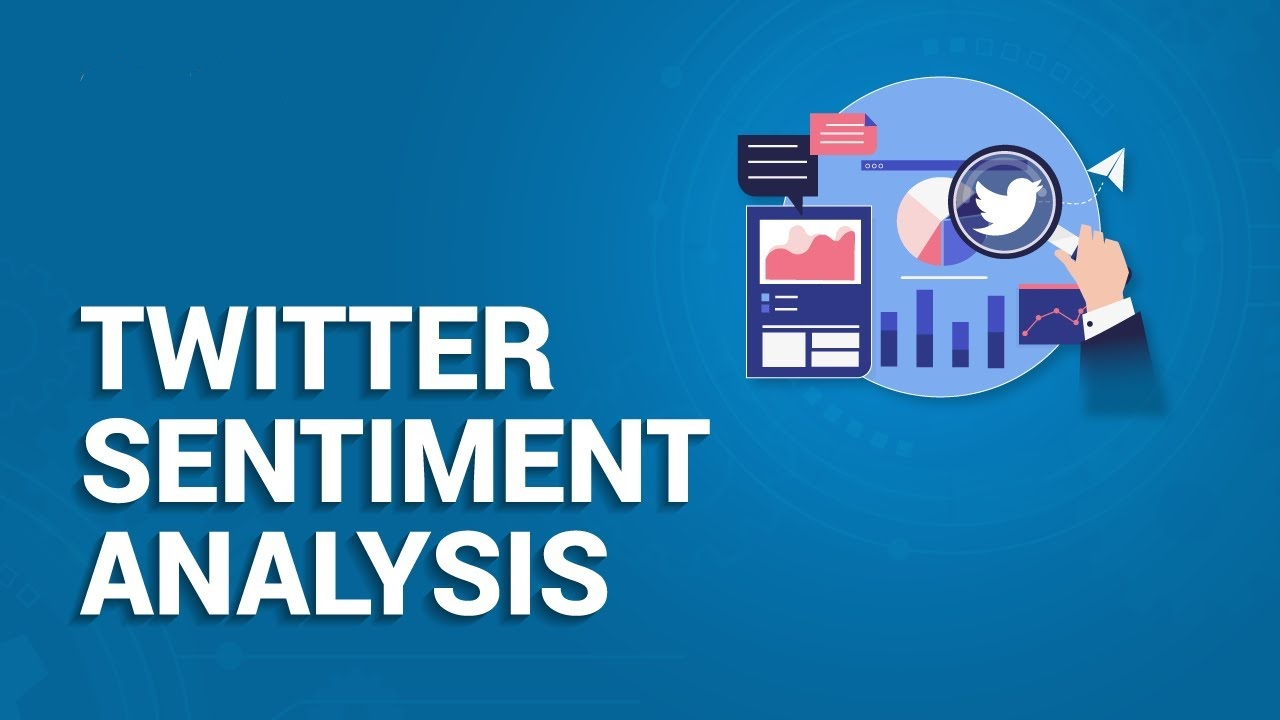

## Importing Libraries


In [151]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [152]:
# Using github to load the dataset
url = 'https://raw.githubusercontent.com/Azhar-ali7/Classification-Project-Coronavirus-Tweet-Sentiment/main/Coronavirus%20Tweets.csv'

# Reading csv file
tweet_df = pd.read_csv(url, encoding = 'latin-1')

Let's look at the top five rows and columns of the dataset.

In [153]:
# Top five rows of the dataset
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Now, lets have a look at the last five rows of the dataset

In [154]:
# Last five rows of the dataset
tweet_df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [155]:
# Looking at the shape of the dataset
tweet_df.shape

(41157, 6)

In [156]:
# No. of rows in Dataset are
print('No. of rows in Dataset are', tweet_df.shape[0])

# No. of columns in Dataset are
print('No. of columns in Dataset are', tweet_df.shape[1])

No. of rows in Dataset are 41157
No. of columns in Dataset are 6


Data types of each column in the dataset

In [157]:
# Data type
tweet_df.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [158]:
# Checking for unique values in each columm of the dataset
tweet_df.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

As we can see in the unique values above that all 'UserName' and 'ScreenName' are unique because in this data we have only one tweet per user over the 30 days span (because we have 30 unique values in 'TweetAt').

In [159]:
# Name of columns in the dataset
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [160]:
# Description of the dataset
tweet_df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [161]:
# Info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


As we saw in the cell above that there are some null values present in the 'Location' column. Now, let's find out the exact number of missing values.

In [162]:
# Total missing values in each column
tweet_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [163]:
# Null values in terms of percentage
tweet_df.isna().sum()/tweet_df.shape[0]*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

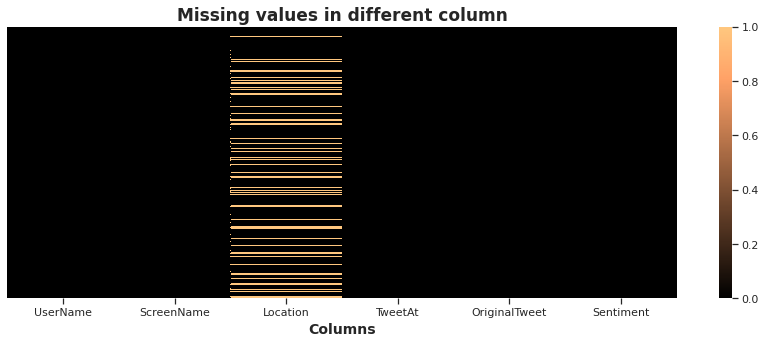

In [164]:
# Plotting heatmap of different columns to check the missing values
plt.figure(figsize=(15, 5))
sns.heatmap(tweet_df.isnull(), cbar=True, yticklabels=False, cmap='copper')
plt.xlabel("Columns", size=14, fontweight="bold")
plt.title("Missing values in different column",fontweight="bold",size=17)
plt.show()

We will fill the null values in 'Location' with 'Unknown' because we don't know the locations of the tweets.

In [165]:
# Filling null values in 'Location' with unknown
# tweet_df.fillna(('Unknown') ,inplace = True)

In [166]:
# Checking for duplicapte values in the data set
tweet_df.duplicated().sum()

There are no duplicates values in this dataset

## Exploratory Data Analysis

###Top 12 'Location' of Tweets

In [167]:
# Assigning a variable to store the top 12 location from 'Location'
top_loc = tweet_df['Location'].value_counts().head(12)

# Converting the variable into dataframe
top_loc = pd.DataFrame(top_loc)

# Reseting index
top_loc.reset_index(inplace= True)

# Renaming the columns
top_loc.rename(columns = {'index': 'Location', 'Location': 'Tweet Count'}, inplace= True)

# Head 
top_loc.head(12)

,Location,Tweet Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

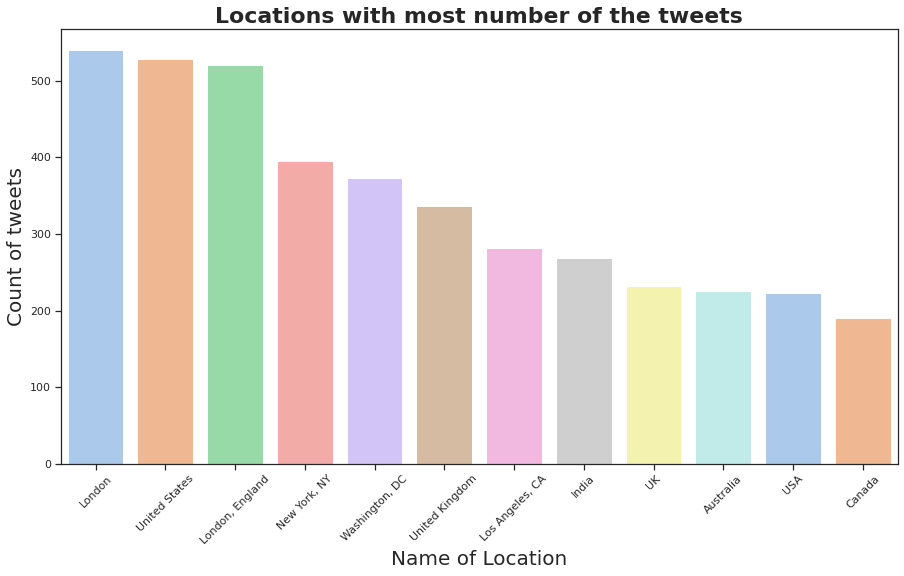

In [168]:
# Plotting the barplot top 12 locations with most number of tweets

# Setting figure size
sns.set(rc={'figure.figsize':(15,8)})

# Background style of figure
sns.set_style('ticks')

# Barplot
sns.barplot(x='Location', y='Tweet Count', data= top_loc, palette='pastel')

# Setting title
plt.title('Locations with most number of the tweets', fontweight='bold', fontsize = 22)

# Label on y-axis
plt.ylabel('Count of tweets', fontsize = 20)

# Label on x-axis
plt.xlabel('Name of Location', fontsize = 20)

# Rotating x-labels for better visuluzation
plt.xticks(rotation=45)

###Tweets by Date

In [169]:
# Counting the values in 'TweetAt' colums
tweet_df['TweetAt'].value_counts().to_frame()

,TweetAt
20-03-2020,3448
19-03-2020,3215
25-03-2020,2979
18-03-2020,2742
21-03-2020,2653
22-03-2020,2114
23-03-2020,2062
17-03-2020,1977
08-04-2020,1881
07-04-2020,1843


In [170]:
# Description of 'TweetAt'
tweet_df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

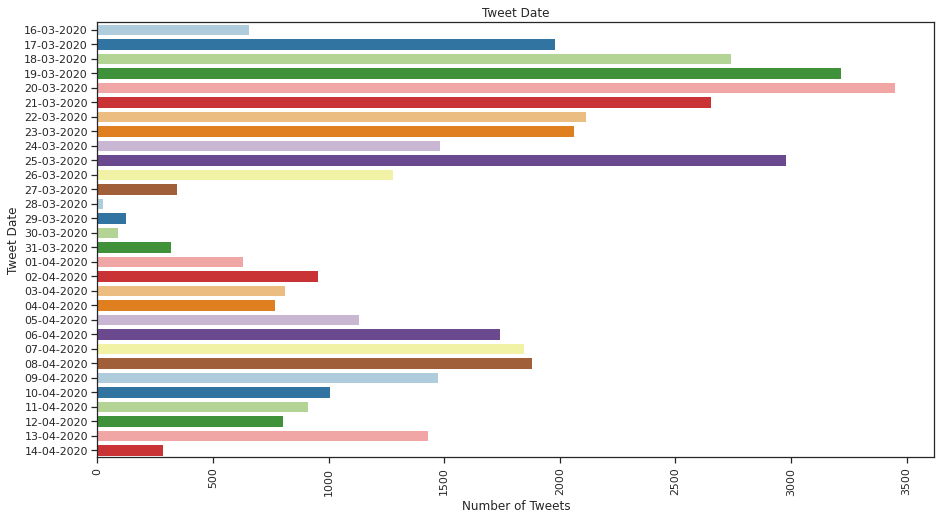

In [171]:
# Count plot
sns.countplot(y ='TweetAt', data = tweet_df, palette ='Paired')

# Setting title
plt.title('Tweets by Date', fontweight = 'bold', fontsize = 20)

# Setting x-label
plt.ylabel("Tweet Date", fontweight = 'bold', fontsize = 17)

# Setting y-label
plt.xlabel("Number of Tweets", fontweight = 'bold', fontsize = 17)

# Adjusting x-labels for better visualization
plt.xticks(rotation = 90)

### Length of 'OriginalTweet'

In [174]:
# Checking the length og 'OriginalTweet'
tweet_df['OriginalTweet'].str.len()

0        111
1        237
2        131
3        306
4        310
        ... 
41152    102
41153    138
41154    136
41155    111
41156    255
Name: OriginalTweet, Length: 41157, dtype: int64

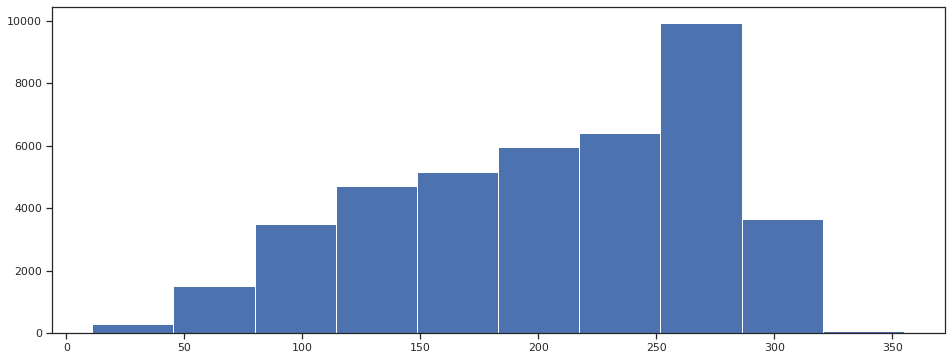

In [175]:
# Setting the figure size
plt.figure(figsize=(16,6))

# Plottting the histogram of the length of 'OriginalTweet'
plt.hist(tweet_df['OriginalTweet'].str.len())

# Showing the plot
plt.show()

We can se in the above histogram that the distribution of the length of the tweets is negatively skewed or right skewed.

In [176]:
# Total value count of  all 'Sentiments'
tweet_df['Sentiment'].value_counts().to_frame()

,Sentiment
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


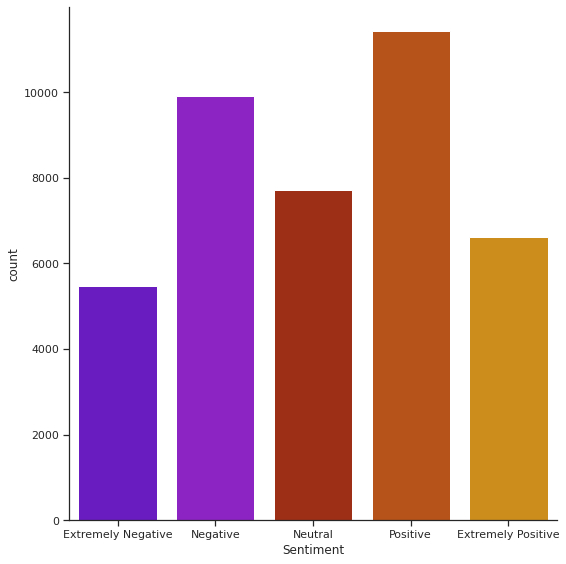

In [177]:
# Sentiment countplot
sns.catplot('Sentiment', data= tweet_df, kind='count', height=7, palette= 'gnuplot',
            order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']) # setting the order of sentiments from negative to positive

###Characters in different tweet sentiments

Now, we will make a copy the data frame and add a new column 'text' in the new data frame. Next, we will convert the data type of 'text' to string.

In [178]:
# Making a copy of the dataframe
tt_df = tweet_df.copy()

# Creating the new column 'Text'
tt_df['text'] = tt_df.OriginalTweet

# Connverting the 'text' column to string type
tt_df["text"] = tt_df["text"].astype(str)

Now, using subplots we will plot five different histograms side-by-side of each 'sentiment' to check the length of tweets.

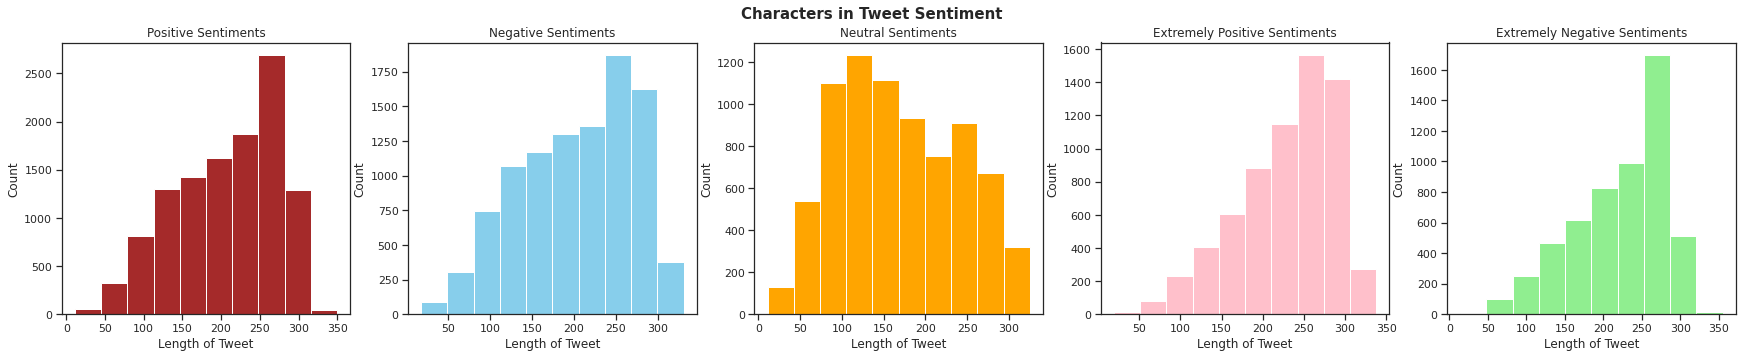

In [179]:
# Plotting the number of character in all tweets for different types of sentiments using subplots
figure, (axes1,axes2,axes3,axes4,axes5)= plt.subplots(1,5,figsize=(30,5)) 

# First histogram
# Selecting only 'Positive' sentiment tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Positive"]['text'].str.len()
axes1.hist(tweet_len,color='brown')
# Setting x-label, y-label and title nm,.
axes1.set_title('Positive Sentiments')
axes1.set_xlabel('Length of Tweet')
axes1.set_ylabel('Count')

# Second histogram
# Selecting only 'Negative' sentiment tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Negative"]['text'].str.len()
axes2.hist(tweet_len,color='skyblue')
# Setting x-label, y-label and title
axes2.set_title('Negative Sentiments')
axes2.set_xlabel('Length of Tweet')
axes2.set_ylabel('Count')

# Third histogram
# Selecting only 'Neutral' sentiment tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.len()
axes3.hist(tweet_len,color='orange')
# Setting x-label, y-label and title
axes3.set_title('Neutral Sentiments')
axes3.set_xlabel('Length of Tweet')
axes3.set_ylabel('Count')

# Fourth histogram
# Selecting only 'Extremely Positive' sentiments tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.len()
axes4.hist(tweet_len,color='pink')
# Setting x-label, y-label and title
axes4.set_title('Extremely Positive Sentiments')
axes4.set_xlabel('Length of Tweet')
axes4.set_ylabel('Count')

# Fifth histogram
# Selecting only 'Extremely Negative' sentiments tweets and converting 'text' to sting (for length calculation)
tweet_len=tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.len()
axes5.hist(tweet_len,color='lightgreen')
# Setting x-label, y-label and title
axes5.set_title('Extremely Negative Sentiments')
axes5.set_xlabel('Length of Tweet')
axes5.set_ylabel('Count')

# Setting title
figure.suptitle("Characters in Tweet Sentiment", size=15,fontweight="bold")

# Showing the plot
plt.show()

All sentiment types except 'Neutral' sentiments are negatively skewed, this means that the majority of tweets are greater in length and on the other hand 'Neurtal' sentiments characters distribution is close to Normal or Gaussian Distribution.

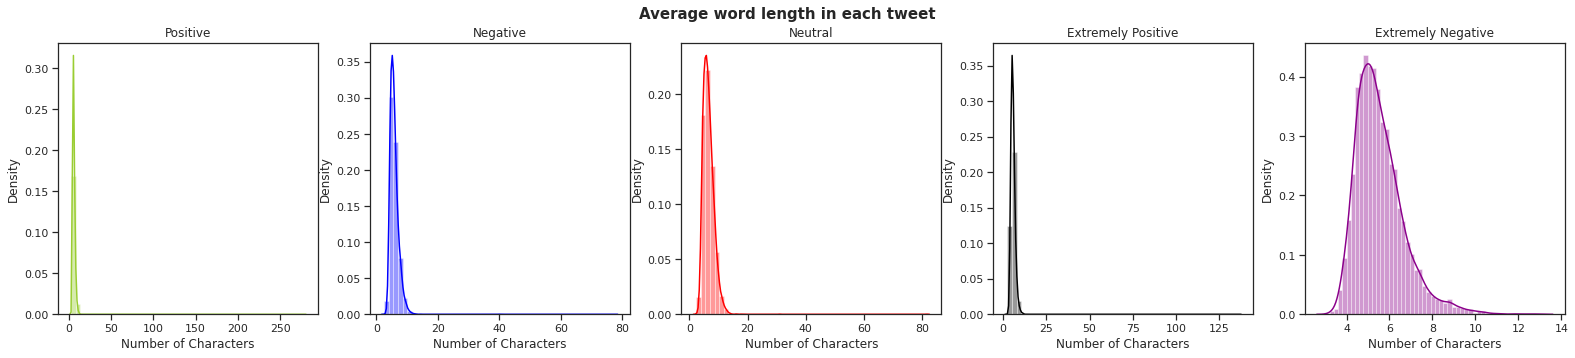

In [180]:
# Finding the average word length in each tweet sentiment type. 
fig,(axe1,axe2,axe3,axe4,axe5)=plt.subplots(1,5,figsize=(27,5))

# First distribution plot
# Selecting only 'Positive' sentiments tweets storing length of each word (using lambda function) in 'word1'
word1= tt_df[tt_df['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])

# Distribution plot of the mean of each word stored in 'word1'. Setting title and xlabel
sns.distplot(word1.map(lambda x: np.mean(x)),ax=axe1,color='yellowgreen')
axe1.set_title('Positive')
axe1.set_xlabel('Number of Characters')


# Second distribution plot
# Selecting only 'Positive' sentiments tweets storing length of each word (using lambda function) in 'word2'
word2= tt_df[tt_df['Sentiment']=="Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])

# Distribution plot of the mean of each word stored in 'word2'. Setting title and xlabel
sns.distplot(word2.map(lambda x: np.mean(x)),ax=axe2,color='blue')
axe2.set_title('Negative')
axe2.set_xlabel('Number of Characters')


# Third distribution plot
# Selecting only 'Positive' sentiments tweets storing length of each word (using lambda function) in 'word3'
word3= tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])

# Distribution plot of the mean of each word stored in 'word3'. Setting title and xlabel
sns.distplot(word3.map(lambda x: np.mean(x)),ax=axe3,color='red')
axe3.set_title('Neutral')
axe3.set_xlabel('Number of Characters')


# Fourth distribution plot
# Selecting only 'Positive' sentiments tweets storing length of each word (using lambda function) in 'word4'
word4= tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])

# Distribution plot of the mean of each word stored in 'word4'. Setting title and xlabel
sns.distplot(word4.map(lambda x: np.mean(x)),ax=axe4,color='black')
axe4.set_title('Extremely Positive')
axe4.set_xlabel('Number of Characters')


# Fifth distribution plot
# Selecting only 'Positive' sentiments tweets storing length of each word (using lambda function) in 'word5'
word5= tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])

# Distribution plot of the mean of each word stored in 'word5'. Setting title and xlabel
sns.distplot(word5.map(lambda x: np.mean(x)),ax=axe5,color='darkmagenta')
axe5.set_title('Extremely Negative')
axe5.set_xlabel('Number of Characters')

# Showing the Plot 

fig.suptitle('Average word length in each tweet', size=15,fontweight="bold")
plt.show()

### Top 20 mentions in Tweets

In [183]:
# Importing re
import re

# Defining a function 
def mentions(text):
  '''
  this function returns the words starting with '@' symbol
  '''
  var1 = re.findall(r'(?<=@)\w+',text)
  return " ".join(var1)

After defining the function, we will now use the lambda function to apply mentions (function) on the 'text' column and store it in a new column 'mention'.

In [184]:
# Applying the above function on 'text' and naming it as new column 'mentions'
tt_df['mentions']=tt_df['text'].apply(lambda x:mentions(x))

# Assiging a variable to store the top 20 mentions
temp1 =tt_df['mentions'].value_counts()[:][1:21]

# Changing the column names after converting 'temp1' to DataFrame and resetting index
temp1 =temp1.to_frame().reset_index().rename(columns={'index':'Mentions','mentions':'count'})
temp1

,Mentions,count
0,realDonaldTrump,125
1,YouTube,74
2,BorisJohnson,62
3,Tesco,61
4,amazon,59
5,FTC,45
6,sainsburys,41
7,McKinsey,33
8,piersmorgan,33
9,narendramodi,31


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

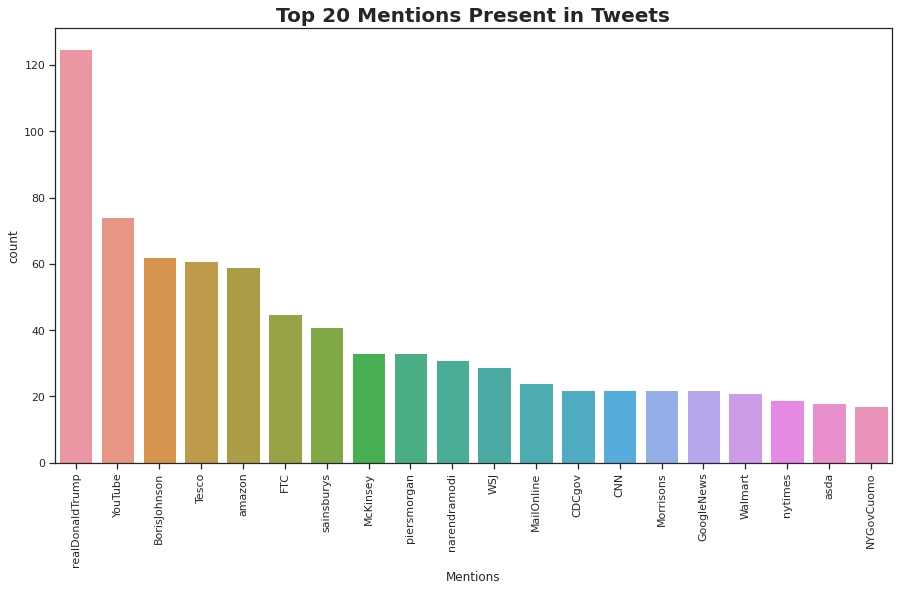

In [185]:
# Ploting the bar plot 
sns.barplot(x="Mentions",y="count", data = temp1)

# Setting title and adjusting fonts
plt.title("Top 20 Mentions Present in Tweets", fontweight='bold', fontsize = 20)

# Rotating the labels on x-axis for better visualization
plt.xticks(rotation= 90)

###Top 15 Hashtags in Tweets

In [186]:
# Defining a function
def hashtags(text):
  '''
  this function returns the words starting with '#' punctuation
  '''
  line=re.findall(r'(?<=#)\w+',text)
  return " ".join(line)

We defined a function above called 'hashtags' and now we will use this function on 'text' column and store all the hashtags in a new column 'Hashtag'

In [187]:
# Applying lambda function on 'text' and storing in a new column 'Hashtag'
tt_df['Hashtag']=tt_df['text'].apply(lambda x:hashtags(x))

# Storing top 15 hashtags in 'temp'
temp=tt_df['Hashtag'].value_counts()[:][1:16]

# Resetting index, converting i temp to data frame and renaming column names
temp = temp.to_frame().reset_index().rename(columns={'index':'Hashtag','Hashtag':'count'})
temp

,Hashtag,count
0,coronavirus,2670
1,Covid_19,652
2,Coronavirus,541
3,COVID2019,415
4,coronavirus COVID19,215
5,COVID19,215
6,CoronaCrisis,167
7,COVID19 coronavirus,158
8,CoronaVirus,133
9,SocialDistancing,105


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

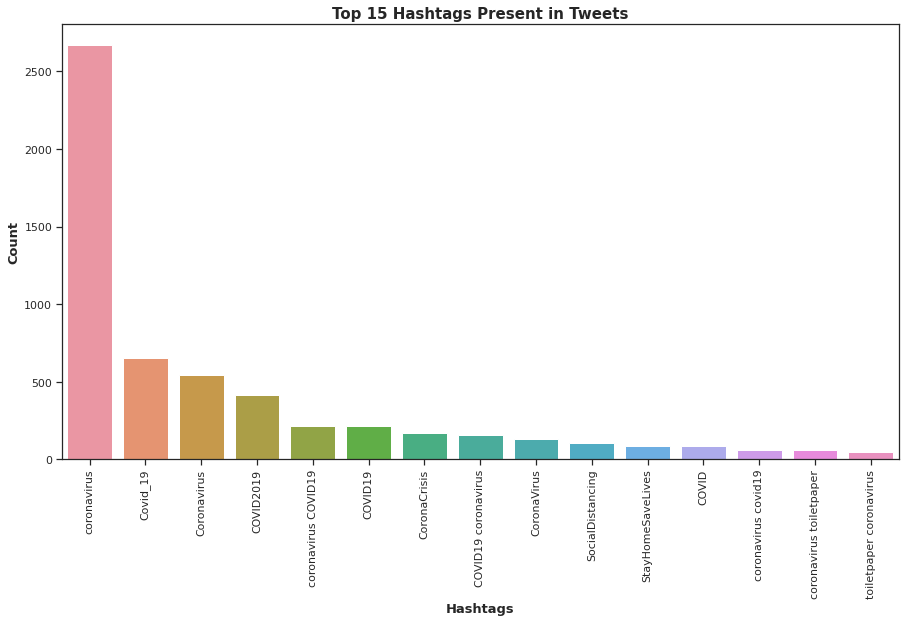

In [188]:
# Bar plot of hashtags
sns.barplot(x="Hashtag",y="count", data = temp)

# Setting title, xlabel, ylabel and fonts
plt.title("Top 15 Hashtags Present in Tweets", fontweight='bold', fontsize = 15)
plt.xlabel('Hashtags', fontweight = 'bold', fontsize = 13)
plt.ylabel('Count', fontweight = 'bold', fontsize = 13)

# Rotating xlabels for better visualization
plt.xticks(rotation= 90)

As we can see in the above barplot that almost all the hashtags contain 'Covid' or 'coronavirus' keyword so, there is no point in looking at the hashtags of all types of sentiments because they will be almost the same.

##Text Pre-Processing

In [189]:
# Making a copy
df_t = tweet_df.copy()

In [191]:
# # create new column with removed @user
# df_t['Cleaned_Tweet'] = np.vectorize(remove_symbols)(df_t['OriginalTweet'], '@[\w]*')

###Removing url from tweets

In [192]:
# Making a different columns for Cleaned Tweet
df_t['Cleaned_Tweet'] = df_t['OriginalTweet']

In [193]:
# Removing 'https:\/\/' from Cleaned tweet using lambda function
df_t['Cleaned_Tweet'] = df_t['Cleaned_Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [194]:
# import 
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [195]:
# Defining aa function
def remove_punctuations(text):
  ''' 
  this function removes punctuations from the text
  '''

  # replacing the punctuations with no space
  translator = str.maketrans('','', string.punctuation)

  # return the text stripped of punctuation marks
  return text.translate(translator)

In [196]:
# applying the function defined above
df_t['Cleaned_Tweet'] = df_t['Cleaned_Tweet'].apply(remove_punctuations)

###Removing short words

In [197]:
# Importing Natural Language Toolkit
import nltk

# stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
# extracting stopwords from the nltk library
stop_words = stopwords.words('english')

# stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [199]:
# defining a fuction
def remove_stopwords(text):
  '''
  This function removes stop words and converts text to lowercase
  '''

  ## removing stopwords after converting the text to lowercase
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]

  # joining the list of words with space separator 
  return " ".join(text)

In [200]:
# Applying the function to remove the stopwords
df_t['Cleaned_Tweet'] = df_t['Cleaned_Tweet'].apply(remove_stopwords)

In [201]:
# head
df_t.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Cleaned_Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...


In [202]:
from wordcloud import WordCloud
from PIL import Image

# Creating an array from the images using numpy and creating a mask.

wordcloud_img_tweet = np.array(Image.open('/content/drive/MyDrive/tweet_img.png'))
wordcloud_img_mask = np.array(Image.open('/content/drive/MyDrive/mask img.png'))
wordcloud_img_virus = np.array(Image.open('/content/drive/MyDrive/virus.png'))
wordcloud_img_ambu = np.array(Image.open('/content/drive/MyDrive/amb_img.png'))


In [203]:
# Creating new dataframe for wordclouds
cld_df = df_t[['Cleaned_Tweet', 'Sentiment']]
cld_df.head()

,Cleaned_Tweet,Sentiment
0,menyrbie philgahan chrisitv,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive


In [204]:
# Encoding the sentiments from -1 to 1 i.e., from extremely negative to extremely positive
sentiment_map = {"Extremely Negative":-1, "Negative":-1, 
                 "Neutral":0,
                 "Positive":1, "Extremely Positive":1}

# Mapping
cld_df['Sentiment'] = cld_df['Sentiment'].map(sentiment_map)

In [205]:
# Most common words from all tweets (cleaned)
all_words = ' '.join([text for text in cld_df['Cleaned_Tweet']])

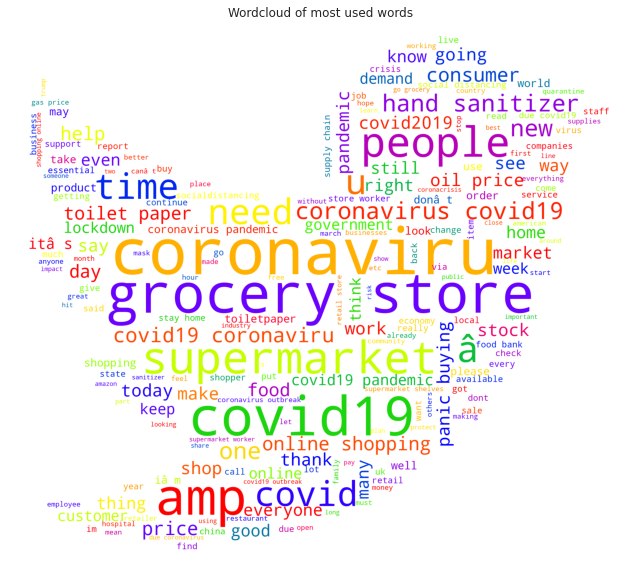

In [206]:
# Wordcloud
cloud = WordCloud(scale=3, colormap='prism' ,background_color='white',collocations=True, mask=wordcloud_img_tweet).generate(all_words)

# Setting figure size and turning of the axes off
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

# Setting title
plt.title('Wordcloud of most used words (all tweets)', fontweight = 'bold', fontsize = 20)
plt.show()

In [207]:
# Most common words in all 'positive' sentiments
all_positive =' '.join([text for text in cld_df['Cleaned_Tweet'][cld_df['Sentiment'] == 1]])

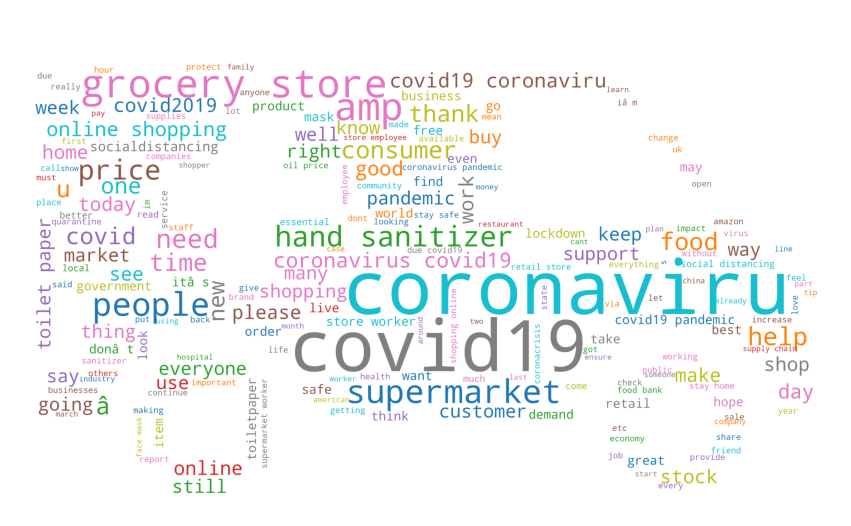

In [208]:
# Wordcloud
cloud1 = WordCloud(scale=5, colormap='tab10', background_color= 'white', collocations=True, mask=wordcloud_img_ambu).generate(all_positive)

# Setting figure size and turning the axes off
plt.figure(figsize=(15, 10))
plt.imshow(cloud1)
plt.axis('off')

# Setting title and fonts
plt.title('Wordcloud of most used words (Positive tweets)', fontweight = 'bold', fontsize = 20)
plt.show()

In [209]:
# Most commonly occuring words in 'Neutral' sentiment
neutral =' '.join([text for text in cld_df['Cleaned_Tweet'][cld_df['Sentiment'] == 0]])

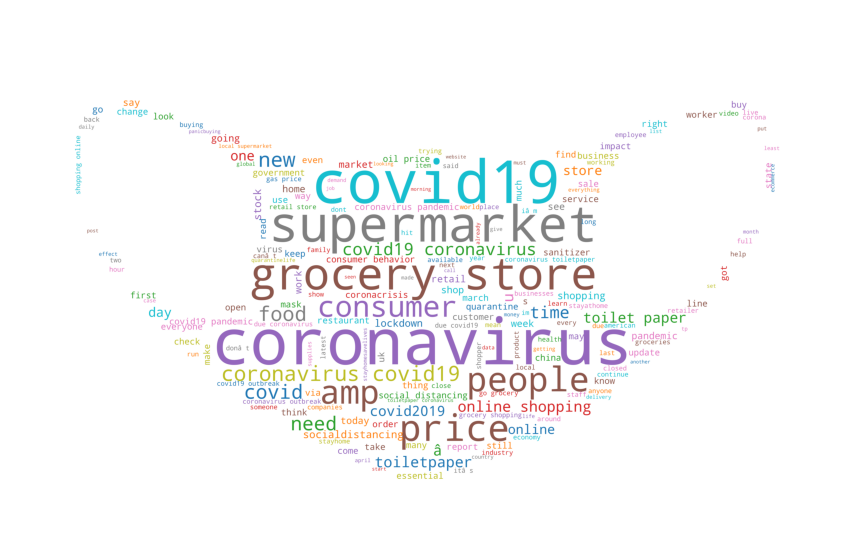

In [210]:
# Wordcloud
cloud2 = WordCloud(scale=5, colormap='tab10', background_color= 'white', collocations=True, mask=wordcloud_img_mask).generate(neutral)

# Setting figure size and turning the axes off
plt.figure(figsize=(15, 10))
plt.imshow(cloud2)
plt.axis('off')

# Setting title and fonts
plt.title('Wordcloud of most used words (Neutral)', fontweight = 'bold', fontsize = 20)
plt.show()

In [211]:
# Most common occuring words in 'Extremely Negative' sentiment
all_negative =' '.join([text for text in cld_df['Cleaned_Tweet'][cld_df['Sentiment'] == -1]])

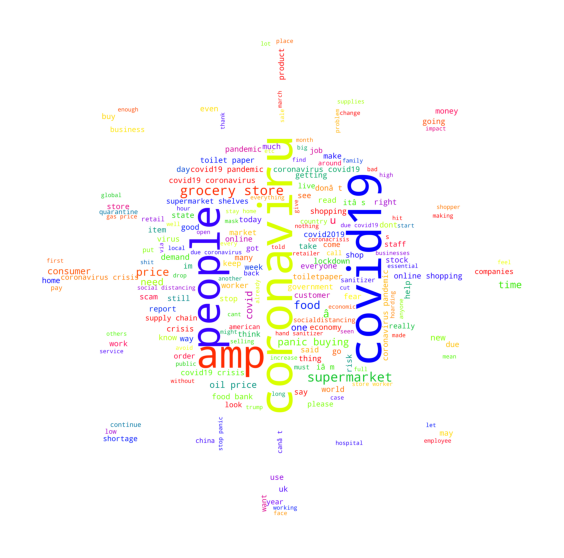

In [212]:
# Wordcloud
cloud3 = WordCloud(scale=5, colormap='prism', background_color= 'white', collocations=True, mask=wordcloud_img_virus).generate(all_negative)

# Setting figure size and turning the axes off
plt.figure(figsize=(15, 10))
plt.imshow(cloud3)
plt.axis('off')

# Setting the title and fonts
plt.title('Wordcloud of most used words (Negative tweets)', fontweight = 'bold', fontsize = 20)
plt.show()

###Stemming

In [213]:
# Importing snowball stemmer
from nltk.stem.snowball import SnowballStemmer

In [214]:
# Object for stemming
stemmer = SnowballStemmer("english")

# Defining a function 
def stemming(text):    
    '''
    this function stems each word in the given text
    '''

    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [215]:
# Applying stemming defined in above function on 'Cleaned_Tweet' column
df_t['Cleaned_Tweet'] = df_t['Cleaned_Tweet'].apply(stemming)
df_t.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Cleaned_Tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elder dis...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empti pleas dont panic enough f...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,readi go supermarket covid19 outbreak im paran...



##Feature Engineering


In [216]:
# Creating new dataframe
df_tnew = df_t[['Cleaned_Tweet', 'Sentiment']]
df_tnew.head(10)

,Cleaned_Tweet,Sentiment
0,menyrbi philgahan chrisitv,Neutral
1,advic talk neighbour famili exchang phone numb...,Positive
2,coronavirus australia woolworth give elder dis...,Positive
3,food stock one empti pleas dont panic enough f...,Positive
4,readi go supermarket covid19 outbreak im paran...,Extremely Negative
5,news regionâ first confirm covid19 case came ...,Positive
6,cashier groceri store share insight covid19 pr...,Positive
7,supermarket today didnt buy toilet paper rebel...,Neutral
8,due covid19 retail store classroom atlanta ope...,Positive
9,corona preventionw stop buy thing cash use onl...,Negative


encoding statement

In [217]:
# Encoding the sentiments from -1, 0 and 1 i.e., from extremely positive to extremely negative
sentiment_map = {"Extremely Negative":-1, "Negative":-1, "Neutral":0, "Positive":1,"Extremely Positive":1}
df_tnew['Sentiment'] = df_tnew['Sentiment'].map(sentiment_map)

In [218]:
df_tnew.head()

,Cleaned_Tweet,Sentiment
0,menyrbi philgahan chrisitv,0
1,advic talk neighbour famili exchang phone numb...,1
2,coronavirus australia woolworth give elder dis...,1
3,food stock one empti pleas dont panic enough f...,1
4,readi go supermarket covid19 outbreak im paran...,-1


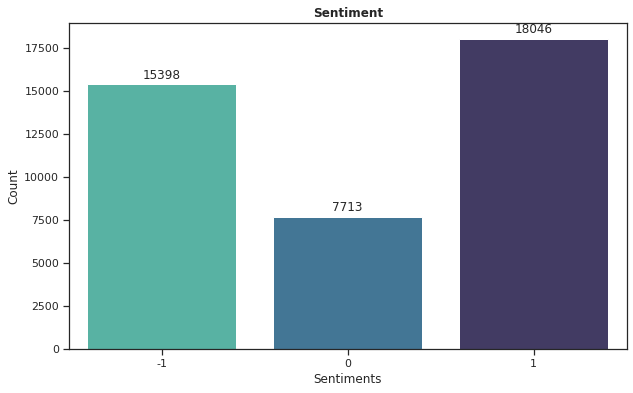

In [219]:
# Plotting the Encoded Sentiments value as countplot 
plt.figure(figsize=(12,6))
splot = sns.countplot(x='Sentiment', data=df_tnew,palette="mako_r")
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment", fontweight='bold')
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Sentiments",fontsize = 12)
plt.show()

In [220]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split

In [221]:
df_tnew.isnull().sum()

Cleaned_Tweet    0
Sentiment        0
dtype: int64

##Train Test Split

In [222]:
# Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
train,valid = train_test_split(df_tnew,test_size = 0.2,random_state=0,stratify = df_tnew.Sentiment.values)

# Printing
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)


train shape :  (32925, 2)
valid shape :  (8232, 2)


Count vectoerizer for multi class classifiication

In [223]:
# Importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Applying stopwards and CountVectorizer for NLP
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

# Fitting using transform  
X_train = vectorizer.fit_transform(train.Cleaned_Tweet.values)
X_valid = vectorizer.transform(valid.Cleaned_Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

# Printing the shape of train and test(valid) values
print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)



X_train.shape :  (32925, 42042)
X_valid.shape :  (8232, 42042)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


In [224]:
# Importing library
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import f1_score

plt.rcParams["figure.figsize"] = (8,6)
labels = ['Negative', 'Neutral', 'Positive']

### Model 1: Naive Bayes Classifier for multiclass

In [225]:
# Importing library
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB() # class instantiation

# Fitting the model train dataset so that model can learn parameter which is used in prediction
naiveByes_clf.fit(X_train,y_train)

MultinomialNB()

In [226]:
# Predicting the train and test
y_pred_NB_valid = naiveByes_clf.predict(X_valid)
y_pred_NB_train = naiveByes_clf.predict(X_train)

# Checking accuracy
NB_accuracy = accuracy_score(y_valid,y_pred_NB_valid)

# Printing the result
print("Train accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(y_pred_NB_valid,y_valid))

Train accuracy Score    :  0.7938344722854973
Validation accuracy Score :  0.674198250728863
              precision    recall  f1-score   support

          -1       0.76      0.67      0.71      3469
           0       0.19      0.75      0.30       383
           1       0.81      0.67      0.73      4380

    accuracy                           0.67      8232
   macro avg       0.59      0.70      0.58      8232
weighted avg       0.76      0.67      0.70      8232



[[10527   142  1649]
 [ 1310  2683  2177]
 [ 1370   140 12927]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

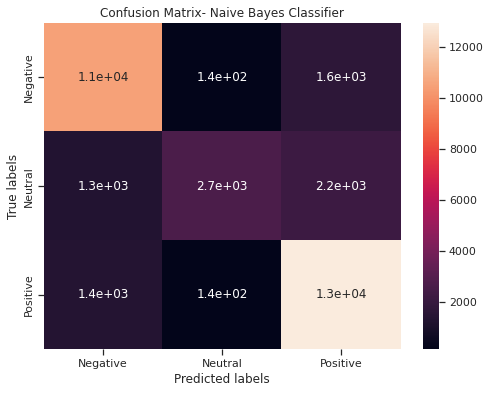

In [227]:
# Confusion Matrix
cm = confusion_matrix(y_train,y_pred_NB_train)
print(cm)

# Plot
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# Setting xlabel, ylabel and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Naive Bayes Classifier')

# 
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [228]:
# Model Performance 
NB_precision = precision_score(y_pred_NB_valid,y_valid, average ='weighted')
NB_recall = recall_score(y_pred_NB_valid,y_valid,average ='weighted')
NB_f1_score = f1_score(y_pred_NB_valid,y_valid,average ='weighted')
print(NB_precision, NB_recall, NB_f1_score)

0.759766208659857 0.674198250728863 0.704326067000336


### Model 2: Stochastic Gradient Descent-SGD Classifier

In [229]:
# Hyperparameter tuning and Cross Validation (CV)

# importing library
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
# class instantiation
sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

param_grid ={}

# fitting parameter with Cross Validation & hyperparameter tuning
grid_sgd = GridSearchCV(sgd_clf, param_grid, verbose = 3, cv = 5)

grid_sgd.fit(X_train,y_train)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.788 total time=   1.0s
[CV 2/5] END ..................................., score=0.806 total time=   1.1s
[CV 3/5] END ..................................., score=0.798 total time=   1.1s
[CV 4/5] END ..................................., score=0.793 total time=   1.0s
[CV 5/5] END ..................................., score=0.797 total time=   0.8s


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=0), param_grid={},
             verbose=3)

In [230]:
# Prediction
y_pred_sgd_valid = grid_sgd.predict(X_valid)
y_pred_sgd_train = grid_sgd.predict(X_train)

# Accuracy
sgd_accuracy = accuracy_score(y_valid,y_pred_sgd_valid)

# Printing accuracy and classification report
print("Train accuracy Score      : ",grid_sgd.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(y_pred_sgd_valid,y_valid))

Train accuracy Score      :  0.9308124525436599
Validation accuracy Score :  0.8067298347910593
              precision    recall  f1-score   support

          -1       0.82      0.82      0.82      3056
           0       0.72      0.69      0.70      1590
           1       0.84      0.84      0.84      3586

    accuracy                           0.81      8232
   macro avg       0.79      0.79      0.79      8232
weighted avg       0.81      0.81      0.81      8232



[[11548   264   506]
 [  339  5473   358]
 [  492   319 13626]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

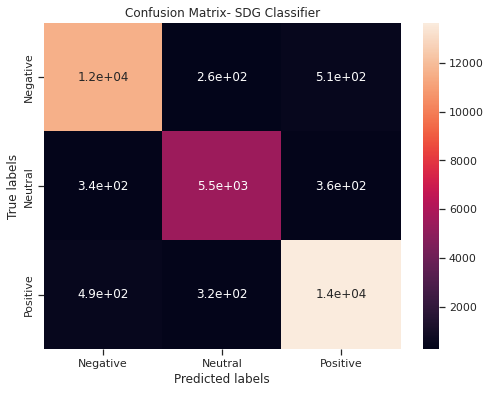

In [231]:
# Confusion Matrix
cm1 = confusion_matrix(y_train, y_pred_sgd_train)
print(cm1)

# Plot
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax) #annot=True to annotate cells

# Setting xlabel, ylabel and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- SDG Classifier')


ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [232]:
# Model Performance 
sgd_precision = precision_score(y_pred_sgd_valid,y_valid, average = 'weighted')
sgd_recall = recall_score(y_pred_sgd_valid,y_valid,average = 'weighted')
sgd_f1_score = f1_score(y_pred_sgd_valid,y_valid,average = 'weighted')
print(sgd_precision, sgd_recall, sgd_f1_score)

0.8060952111307393 0.8067298347910593 0.8063734886879689


###Model 3: Random Forest Classifier

In [233]:
# Importing library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [234]:
# Creating param dict to check diffirent value of parameter
grid_values = {'n_estimators':[60,80,100],
               'max_depth':[100,200,300]}
               
# Fitting the parameters with Cross Validation 
rf_clf = GridSearchCV(RandomForestClassifier(), param_grid= grid_values,verbose= 3, cv=5, scoring ='accuracy')

# Training model
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....max_depth=100, n_estimators=60;, score=0.672 total time=  45.2s
[CV 2/5] END ....max_depth=100, n_estimators=60;, score=0.679 total time=  48.5s
[CV 3/5] END ....max_depth=100, n_estimators=60;, score=0.688 total time=  48.6s
[CV 4/5] END ....max_depth=100, n_estimators=60;, score=0.668 total time=  43.8s
[CV 5/5] END ....max_depth=100, n_estimators=60;, score=0.690 total time=  46.8s
[CV 1/5] END ....max_depth=100, n_estimators=80;, score=0.674 total time= 1.1min
[CV 2/5] END ....max_depth=100, n_estimators=80;, score=0.687 total time= 1.0min
[CV 3/5] END ....max_depth=100, n_estimators=80;, score=0.690 total time=  57.8s
[CV 4/5] END ....max_depth=100, n_estimators=80;, score=0.675 total time= 1.0min
[CV 5/5] END ....max_depth=100, n_estimators=80;, score=0.680 total time=  57.0s
[CV 1/5] END ...max_depth=100, n_estimators=100;, score=0.671 total time= 1.2min
[CV 2/5] END ...max_depth=100, n_estimators=100;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [100, 200, 300],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=3)

In [235]:
print(rf_clf.best_params_)
print(rf_clf.best_estimator_)

{'max_depth': 300, 'n_estimators': 80}
RandomForestClassifier(max_depth=300, n_estimators=80)


In [236]:
# Prediction
y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_valid = rf_clf.predict(X_valid)

rf_accuracy = accuracy_score(y_valid, y_pred_rf_valid)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(y_pred_rf_valid,y_valid))

Training accuracy Score    :  0.9905542900531511
Validation accuracy Score :  0.7541302235179786
              precision    recall  f1-score   support

          -1       0.74      0.78      0.76      2893
           0       0.66      0.67      0.66      1504
           1       0.81      0.76      0.79      3835

    accuracy                           0.75      8232
   macro avg       0.73      0.74      0.74      8232
weighted avg       0.76      0.75      0.75      8232



[[12175   140     3]
 [    1  6168     1]
 [    3   163 14271]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')]

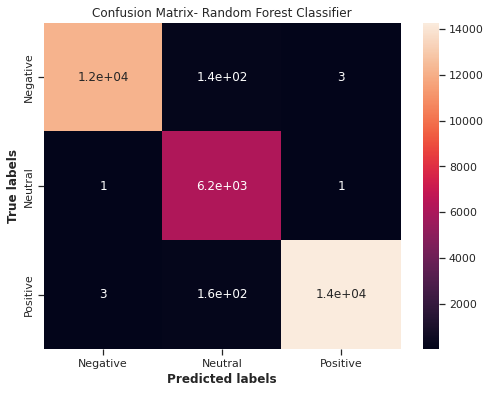

In [237]:
# Confusion Matrix
cm2 = confusion_matrix(y_train, y_pred_rf_train)
print(cm2)

# Plot
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax) #annot=True to annotate cells

# Setting x, y labels and title
ax.set_xlabel('Predicted labels', fontweight= 'bold')
ax.set_ylabel('True labels', fontweight= 'bold')
ax.set_title('Confusion Matrix- Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [238]:
# Model Performance
rf_precision = precision_score(y_pred_rf_valid,y_valid, average ='weighted')
rf_recall = recall_score(y_pred_rf_valid,y_valid,average ='weighted')
rf_f1_score = f1_score(y_pred_rf_valid,y_valid,average ='weighted')
print(rf_precision, rf_recall, rf_f1_score)

0.7566032936259135 0.7541302235179786 0.7547470107750239


###Model 4: Support Vector Machines

In [239]:
# Import the packages
from sklearn.svm import SVC

# Support vector machine
svc_clf =SVC (kernel ='linear',verbose = 3)

# Fitting the model on training datasset
svc_clf.fit(X_train, y_train)

[LibSVM]

KeyboardInterrupt: ignored

In [ ]:
svc_clf.best_estimator_

In [ ]:
# Get the predicted classes
y_pred_svc_train = svc_clf.predict(X_train)
y_pred_svc_valid = svc_clf.predict(X_valid)

# Checking accuracy and printing the classification report
svm_accuracy = accuracy_score(y_valid, y_pred_svc_valid)
print("Training accuracy Score    : ",svc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",svm_accuracy )
print(classification_report(y_pred_svc_valid,y_valid))

In [ ]:
# Confusion Matrix
cm3 = confusion_matrix(y_train, y_pred_svc_train)
print(cm3)


# Plot
ax= plt.subplot()
sns.heatmap(cm3, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- Support Vector Machine(SVM)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Model Performance 
svc_precision = precision_score(y_pred_svc_valid,y_valid, average ='weighted')
svc_recall = recall_score(y_pred_svc_valid,y_valid,average ='weighted')
svc_f1_score = f1_score(y_pred_svc_valid,y_valid,average ='weighted')
print(svc_precision, svc_recall)

###Model 5: Logistic Regression

In [ ]:
# Importing required library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
logistic = LogisticRegression() # class instantiation

# Set the hyperparmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 300, 500, 1000] }


# Fitting the hyperparameter with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, verbose = 3, cv = 5)

# Training model on train dataset
grid_lr.fit(X_train, y_train)

In [ ]:
print(grid_lr.best_score_)
print(grid_lr.best_params_)

In [ ]:
# Prediction
y_pred_lr_train = grid_lr.predict(X_train)
y_pred_lr_valid = grid_lr.predict(X_valid)

# Checking accuracy and printing classification report
lr_accuracy = accuracy_score(y_valid, y_pred_lr_valid)
print("Training accuracy Score    : ",grid_lr.score(X_train,y_train))
print("Validation accuracy Score : ",lr_accuracy )
print(classification_report(y_pred_lr_valid,y_valid))

In [ ]:
# Confusion Matrix
cm4 = confusion_matrix(y_train, y_pred_lr_train)
print(cm4)


# Plot
ax= plt.subplot()
sns.heatmap(cm4, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix-Logistic Regressor')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Model Performance 
lr_precision = precision_score(y_pred_lr_valid,y_valid, average ='weighted')
lr_recall = recall_score(y_pred_lr_valid,y_valid,average ='weighted')
lr_f1_score = f1_score(y_pred_lr_valid,y_valid,average ='weighted')
print(lr_precision, lr_recall, lr_f1_score)

###Model 6 : **CatBoost**

In [ ]:
!pip install catboost

In [ ]:
# Importing required library
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier() # class instantiation
# fitting the model on train dataset so that model can learn parameter.
clf2.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

In [ ]:
# Predicting train and test data
y_pred_cb_valid = clf2.predict(X_valid)
y_pred_cb_train = clf2.predict(X_train)

# Checking accuracy
catboost_accuracy = accuracy_score(y_valid,y_pred_cb_valid)

# Printing classification report
print("Train accuracy Score    : ",clf2.score(X_train,y_train))
print("Test accuracy Score : ",catboost_accuracy )
print(classification_report(y_pred_cb_valid,y_valid))

In [ ]:
# Confusion Matrix
cm5 = confusion_matrix(y_train, y_pred_cb_train)
print(cm5)

# Plot
ax= plt.subplot()
sns.heatmap(cm5, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix- CatBoost')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)



In [ ]:
# Model Performance 
cb_precision = precision_score(y_pred_cb_valid,y_valid, average ='weighted')
cb_recall = recall_score(y_pred_cb_valid, y_valid, average ='weighted')
cb_f1_score = f1_score(y_pred_cb_valid,y_valid,average ='weighted')
print(cb_precision, cb_recall, cb_f1_score)



In [ ]:
# Making the dataframe which consist of models and correspoding evaluation metrics.
model_test = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression','Random Forest', 'Naive Bayes','Stochastic Gradient Decent','CatBoost'],
    'Test accuracy': [svm_accuracy, lr_accuracy,rf_accuracy, NB_accuracy,sgd_accuracy,catboost_accuracy],
    'Recall': [svc_recall, lr_recall, rf_recall, NB_recall, sgd_recall, cb_recall],
    'Precision': [svc_precision, lr_precision, rf_precision, NB_precision, sgd_precision, cb_precision],
    'F1-Score': [svc_f1_score, lr_f1_score, rf_f1_score, NB_f1_score, sgd_f1_score, cb_f1_score]
    })
model_test.sort_values(by='Test accuracy', ascending=False)
model_test

In [ ]:
# Plot
# Creating plot between Test accuracy and all 6 models used
plt.figure(figsize=(8,5))
sns.lineplot(data=model_test, x='Model', y='Test accuracy')
plt.xticks(rotation=45, ha='right')